## Hopf Oscillators Complex Coupled

-144.30974258706587 -52.93061597154764 0.7773566427005639 0.6698255595592497


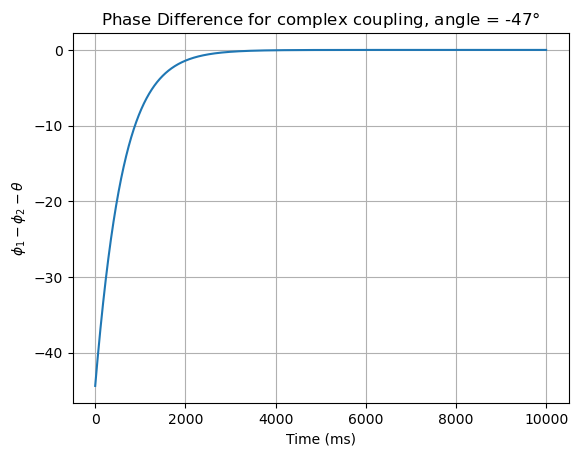

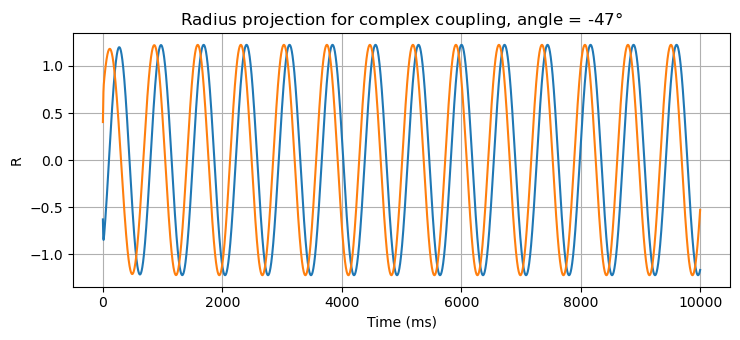

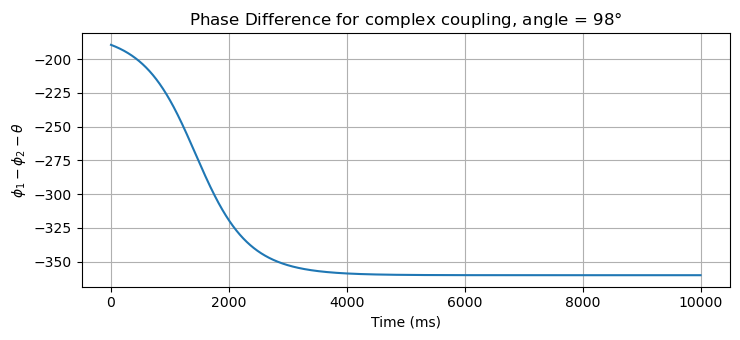

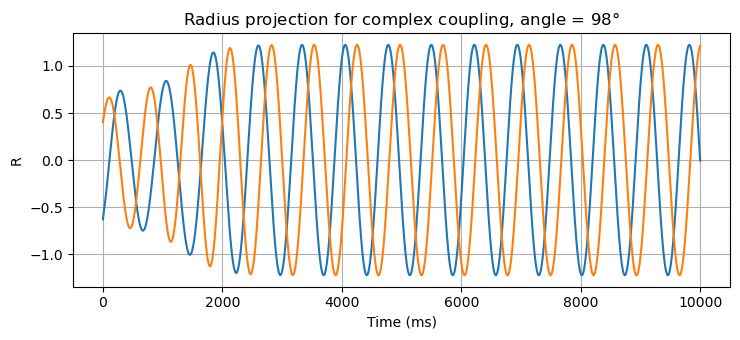

In [2]:
# import all necessary files
import numpy as np
import matplotlib.pyplot as plt
import math
import random
#Initialize parameters
w_1, w_2, w = 5, 5, 5
theta_val = [-47 ,98]
mu = 1
A = 0.5 

# equations defining the hopf oscillators 
dp1dt = lambda r1, r2, p1, p2 : w + A*(r2/r1)*math.sin(math.radians(p2 - p1 + theta)) # d(phi1)/dt
dp2dt = lambda r1, r2, p1, p2 : w + A*(r1/r2)*math.sin(math.radians(p1 - p2 - theta)) # d(phi2)/dt
dr1dt = lambda r1, r2, p1, p2 : mu*(1 - r1**2)*r1 + A*r2*math.cos(math.radians(p2 - p1 + theta)) # d(r1)/dt
dr2dt = lambda r1, r2, p1, p2 : mu*(1 - r2**2)*r2 + A*r1*math.cos(math.radians(p1 - p2 - theta)) # d(r2)/dt

# Using Euler integrations to find the rates
def Integrator(r1, r2, p1, p2, dt, total_time, A):
    iteration = int(total_time // dt) # number of iterations will be total time/ timestep
    p1_values = [p1]
    p2_values = [p2]
    r1_values = [r1]
    r2_values = [r2]

    # iterating through the time steps and storing the values 
    for i in range(iteration):
        p1_next, p2_next = (p1 + dp1dt(r1, r2, p1, p2)*dt), (p2 + dp2dt(r1, r2, p1, p2)*dt) # euler integration for phi's
        
        p1_values.append(p1_next) # append both p1 and p2 next values 
        p2_values.append(p2_next)
        
        r1_next, r2_next = (r1 + dr1dt(r1, r2, p1, p2)*dt), (r2 + dr2dt(r1, r2, p1, p2)*dt) # euler integration for r's

        r1_values.append(r1_next) # append r values as well
        r2_values.append(r2_next)
        
        p1 = p1_next # update p1 and p2 to p1_next and p2_next
        p2 = p2_next

        r1 = r1_next
        r2 = r2_next
        
    return p1_values, p2_values, r1_values, r2_values # return the phi and r values 

# all the random seeds mentioned below cumulate to give the final combined plot
random.seed(1000) 
#random.seed(100) 
#random.seed(10) 
#random.seed(40) 
#random.seed(55)
#random.seed(420)
#random.seed(69)

dt = 0.1 # timestep  = 0.1 s = 1ms
total_time = 1000 # iteration = 10000, total time in seconds

r1 = random.random() #r1 and r2 range from 0,1 in value
r2 = random.random()
p1 = random.uniform(-180, 180) # phi values are selected at random from the range -pi to pi
p2 = random.uniform(-180, 180)

# sanity check
print(p1,p2,r1,r2) 

# finding the phi adn r values for 10000 timesteps
for angle in theta_val:
    theta = angle
    phi_1, phi_2, r_1, r_2 = Integrator(r1, r2, p1, p2, dt, total_time, A)
    
    # Calculating the change in phase difference with every timestep iteration
    Phase_difference= []
    for i in range(len(phi_1)):
        Phase_difference.append(phi_1[i] - phi_2[i] - theta)
    
    r1_cosp1 = []
    r2_cosp2 = []
    for val in range(len(r_1)):
        r1_cosp1.append(r_1[val]*math.cos(math.radians(phi_1[val])))
        r2_cosp2.append(r_2[val]*math.cos(math.radians(phi_2[val])))

    #plot of the variation of phase difference for coupled oscillators
    title_1 = "Phase Difference for complex coupling, angle = " + str(theta) 
    plt.title(title_1 + "$\degree$")
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(range(len(Phase_difference)), Phase_difference)
    plt.grid()
    plt.xlabel("Time (ms)")
    plt.ylabel(''r'$\phi_1-\phi_2-\theta$')
    # plt.savefig( title_1 +'.png')
    plt.show()

    # plot of r's as a function of timestep
    title_2 = "Radius projection for complex coupling, angle = " + str(theta) 
    plt.title(title_2 + "$\degree$")
    plt.plot(range(len(r1_cosp1)), r1_cosp1)
    plt.plot(range(len(r2_cosp2)), r2_cosp2)
    plt.grid()
    plt.xlabel("Time (ms)")
    plt.ylabel('R')
    # plt.savefig( title_2 +'.png')
    plt.show()
################################################################################################
# plt.title('Phase Difference for complex coupling, angle = -47 $\degree$')
# plt.plot(range(10000), Phase_difference_1000, color = 'black')
# plt.plot(range(10000), Phase_difference_100, color = 'black')
# plt.plot(range(10000), Phase_difference_10, color = 'black')
# plt.plot(range(10000), Phase_difference_40, color = 'black')
# plt.plot(range(10000), Phase_difference_55, color = 'black')
# plt.plot(range(10000), Phase_difference_420, color = 'black')
# plt.plot(range(10000), Phase_difference_69, color = 'black')
# plt.plot(range(10000), [0]*10000, color = 'Blue', label = '0')
# plt.plot(range(10000), [-180]*10000, color = 'Green', label = '-180')
# plt.plot(range(10000), [180]*10000, color = 'Red', label = '180')
# plt.grid()
# plt.xlabel("Time (ms)")
# plt.ylabel(''r'$\phi_1-\phi_2-\theta$')
# plt.legend()
# plt.savefig('plot_for_-47.png')
# plt.show()
################################################################################################

## Variation of phase difference with change in A

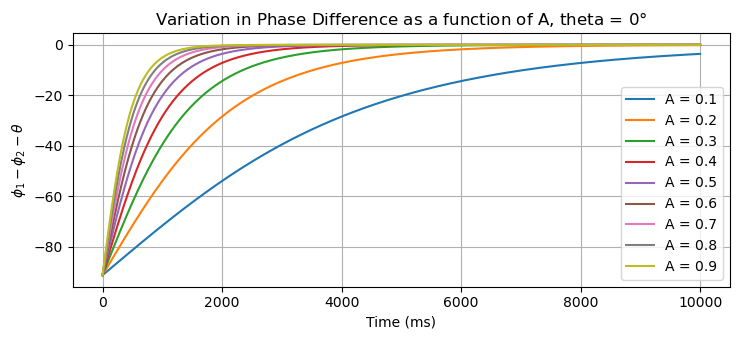

In [9]:
#phase difference variation with A value
theta_val = [0]
A = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Variation = []

# equations defining the hopf oscillators 
dp1dt = lambda r1, r2, p1, p2, A : w + A*(r2/r1)*math.sin(math.radians(p2 - p1 + theta)) # d(phi1)/dt
dp2dt = lambda r1, r2, p1, p2, A : w + A*(r1/r2)*math.sin(math.radians(p1 - p2 - theta)) # d(phi2)/dt
dr1dt = lambda r1, r2, p1, p2, A : mu*(1 - r1**2)*r1 + A*r2*math.cos(math.radians(p2 - p1 + theta)) # d(r1)/dt
dr2dt = lambda r1, r2, p1, p2, A : mu*(1 - r2**2)*r2 + A*r1*math.cos(math.radians(p1 - p2 - theta)) # d(r2)/dt

# Using Euler integrations to find the rates
def Integrator(r1, r2, p1, p2, dt, total_time, A):
    iteration = int(total_time // dt) # number of iterations will be total time/ timestep
    p1_values = [p1]
    p2_values = [p2]
    r1_values = [r1]
    r2_values = [r2]

    # iterating through the time steps and storing the values 
    for i in range(iteration):
        p1_next, p2_next = (p1 + dp1dt(r1, r2, p1, p2, A)*dt), (p2 + dp2dt(r1, r2, p1, p2, A)*dt) # euler integration for phi's
        
        p1_values.append(p1_next) # append both p1 and p2 next values 
        p2_values.append(p2_next)
        
        r1_next, r2_next = (r1 + dr1dt(r1, r2, p1, p2, A)*dt), (r2 + dr2dt(r1, r2, p1, p2, A)*dt) # euler integration for r's

        r1_values.append(r1_next) # append r values as well
        r2_values.append(r2_next)
        
        p1 = p1_next # update p1 and p2 to p1_next and p2_next
        p2 = p2_next

        r1 = r1_next
        r2 = r2_next
        
    return p1_values, p2_values, r1_values, r2_values # return the phi and r values 

random.seed(1000) 

dt = 0.1 # timestep  = 0.1 s = 1ms
total_time = 1000 # iteration = 10000, total time in seconds

r1 = random.random() #r1 and r2 range from 0,1 in value
r2 = random.random()
p1 = random.uniform(-180, 180) # phi values are selected at random from the range -pi to pi
p2 = random.uniform(-180, 180)

for value in A:
    for angle in theta_val:
        theta = angle
        phi_1, phi_2, r_1, r_2 = Integrator(r1, r2, p1, p2, dt, total_time, value)
        
        # Calculating the change in phase difference with every timestep iteration
        Phase_difference = []
        for i in range(len(phi_1)):
            Phase_difference.append(phi_1[i] - phi_2[i] - theta)
        
        Variation.append(Phase_difference)
        

#plot of the variation of phase difference for coupled oscillators
title_1 = "Variation in Phase Difference as a function of A, theta = 0" 
plt.title(title_1 + "$\degree$")
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

plt.grid()
for element in range(len(Variation)):
    plt.plot(range(len(Variation[element])), Variation[element], label = 'A = ' + str(A[element]))
    plt.xlabel("Time (ms)")
    plt.ylabel(''r'$\phi_1-\phi_2-\theta$')
plt.legend()
plt.savefig( title_1 +'.png')

plt.show()